In [8]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import os 

In [9]:
DATA_PATH = '../data/processed/airfoil_self_noise_with_headers.csv'

In [12]:
df =pd.read_csv(DATA_PATH)

 ---------------------------------

 2. Columns to Apply Log and Square Root Conversion

 ---------------------------------

Purpose:To make non-linear relationships more meaningful, to normalize the distribution and to increase model accuracy.

Conversion applicable columns:

 - frequency: Frequency value -> log, can be sqrt.

 - chord-length: Wing width can be -> generally positive -> log.

 - suction-side-displacement-thickness: boundary layer thickness can be -> log/sqrt.

In [15]:
df['log_frequency'] = np.log1p(df['frequency'])
df['sqrt_frequency'] = np.sqrt(df['frequency'])

df["log_chord_length"] = np.log1p(df["chord-length"])
df["sqrt_chord_length"] = np.sqrt(df["chord-length"])

df['log_suction_side_displacement_thickness'] = np.log1p(df['suction-side-displacement-thickness'])
df['sqrt_suction_side_displacement_thickness'] = np.sqrt(df['suction-side-displacement-thickness'])




# Visualization

In [18]:
def plot_transformations(column):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    

    sns.histplot(df[column], ax=axes[0], kde=True)
    axes[0].set_title(f"Original: {column}")
    

    log_col = f"log_{column.replace('-', '_')}"  
    if log_col in df.columns:
        sns.histplot(df[log_col], ax=axes[1], kde=True)
        axes[1].set_title(f"log1p({column})")
    else:
        axes[1].set_title(f"{log_col} not found")
    

    sqrt_col = f"sqrt_{column.replace('-', '_')}"
    if sqrt_col in df.columns:
        sns.histplot(df[sqrt_col], ax=axes[2], kde=True)
        axes[2].set_title(f"sqrt({column})")
    else:
        axes[2].set_title(f"{sqrt_col} not found")
    
    plt.tight_layout()
    plt.show()

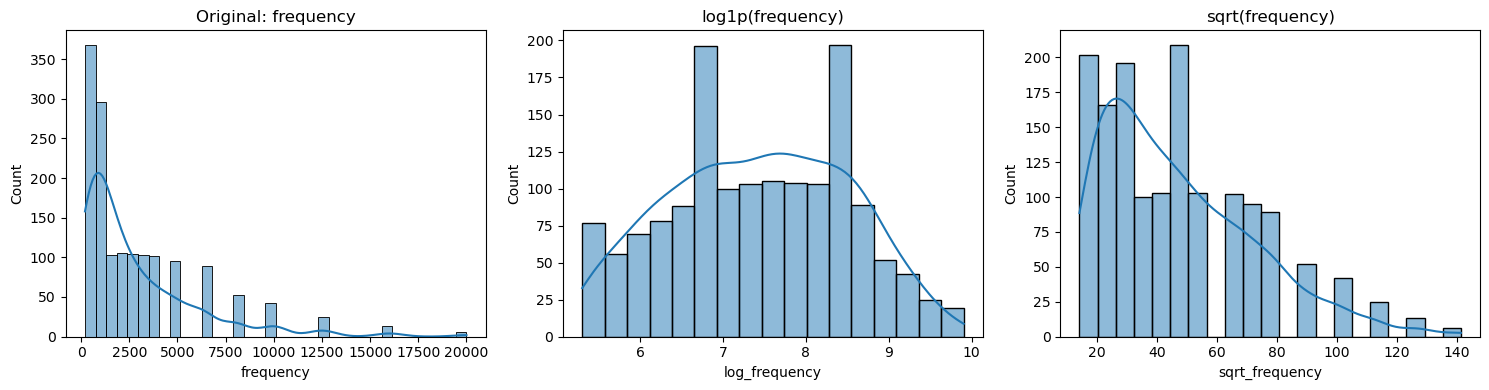

In [20]:
plot_transformations("frequency")

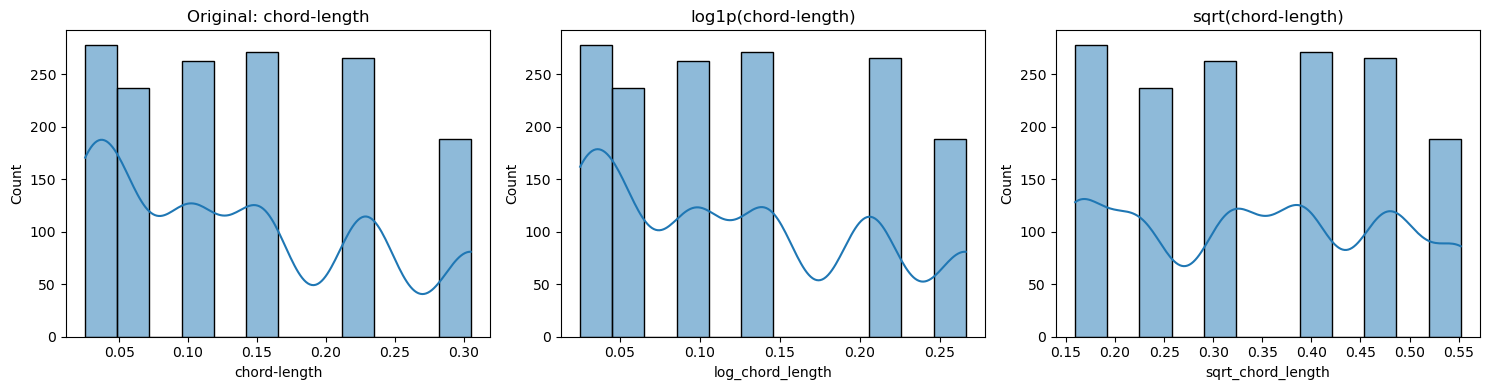

In [22]:
plot_transformations("chord-length")

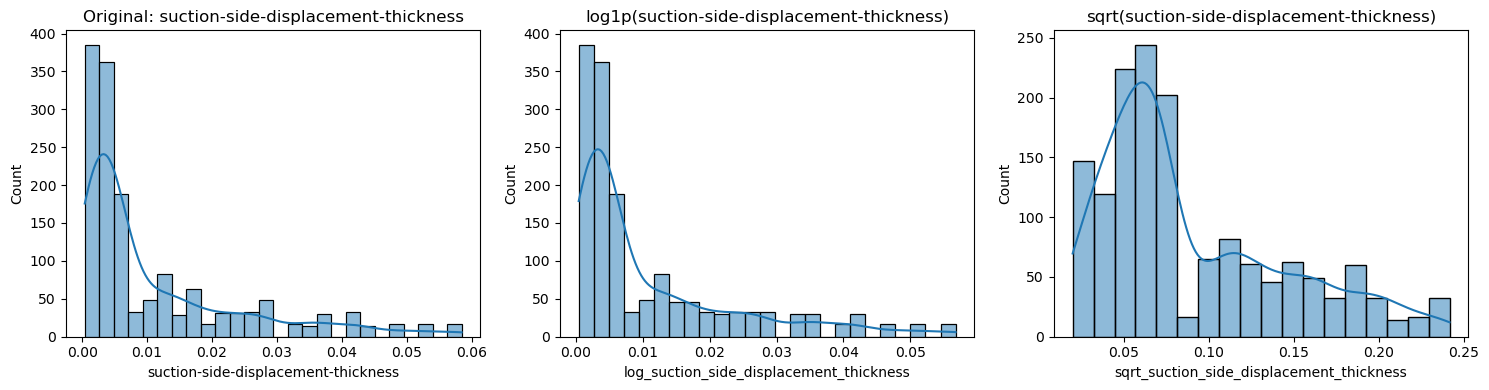

In [24]:
plot_transformations("suction-side-displacement-thickness")

df.to_csv("../data/airfoil_transformed.csv", index=False)

# Target Analysis

In [28]:
df['scaled-sound-pressure'].describe()

count    1503.000000
mean      124.835943
std         6.898657
min       103.380000
25%       120.191000
50%       125.721000
75%       129.995500
max       140.987000
Name: scaled-sound-pressure, dtype: float64

# Distribution Chart

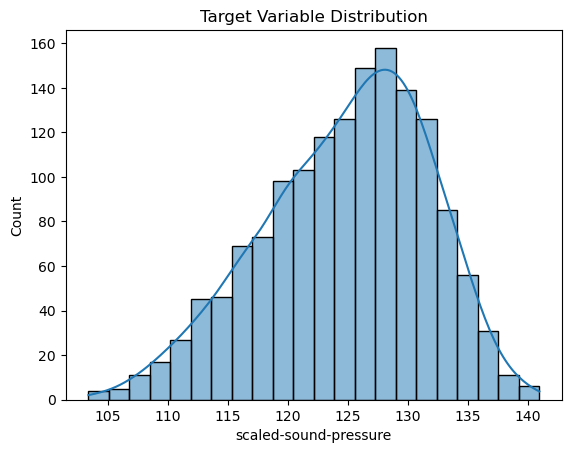

In [31]:
sns.histplot(df['scaled-sound-pressure'], kde=True)
plt.title("Target Variable Distribution")
plt.show()

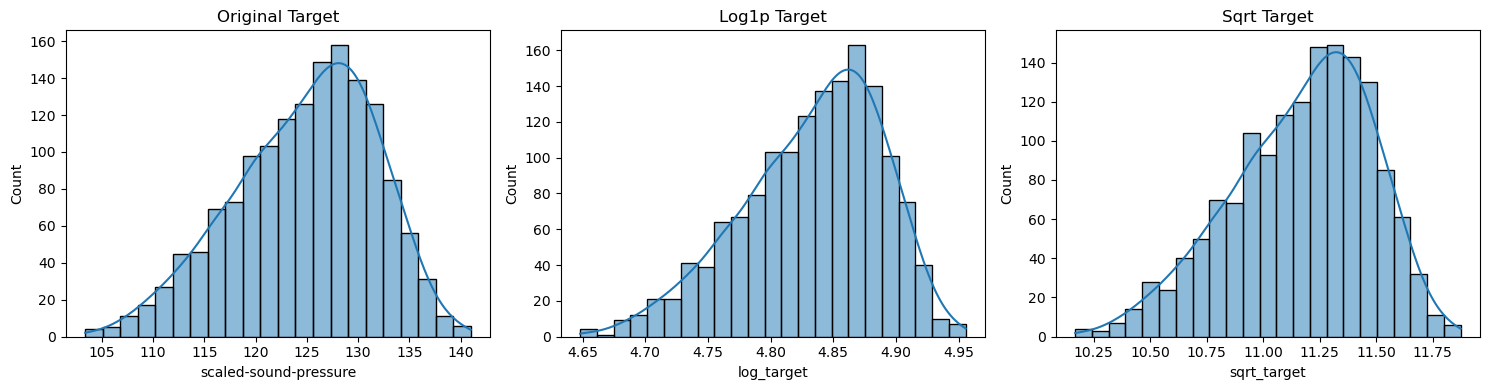

In [33]:
df["log_target"] = np.log1p(df['scaled-sound-pressure'])
df["sqrt_target"] = np.sqrt(df['scaled-sound-pressure'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['scaled-sound-pressure'], ax=axes[0], kde=True)
axes[0].set_title("Original Target")

sns.histplot(df["log_target"], ax=axes[1], kde=True)
axes[1].set_title("Log1p Target")

sns.histplot(df["sqrt_target"], ax=axes[2], kde=True)
axes[2].set_title("Sqrt Target")

plt.tight_layout()
plt.show()


In [35]:
corr_matrix = df.corr(numeric_only=True)
target_corrs = corr_matrix['scaled-sound-pressure'].sort_values(ascending=False)
print(target_corrs)

scaled-sound-pressure                       1.000000
sqrt_target                                 0.999850
log_target                                  0.999406
Unnamed: 0                                  0.156770
free-stream-velocity                        0.125103
attack-angle                               -0.156108
chord-length                               -0.236162
log_chord_length                           -0.237321
sqrt_chord_length                          -0.239038
log_suction_side_displacement_thickness    -0.312210
suction-side-displacement-thickness        -0.312670
sqrt_suction_side_displacement_thickness   -0.312874
log_frequency                              -0.354800
frequency                                  -0.390711
sqrt_frequency                             -0.399046
Name: scaled-sound-pressure, dtype: float64


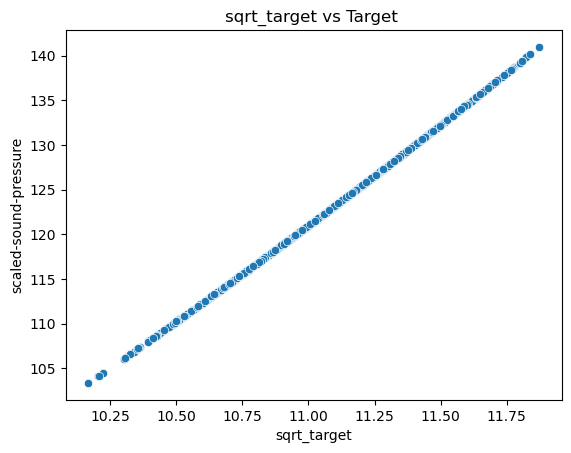

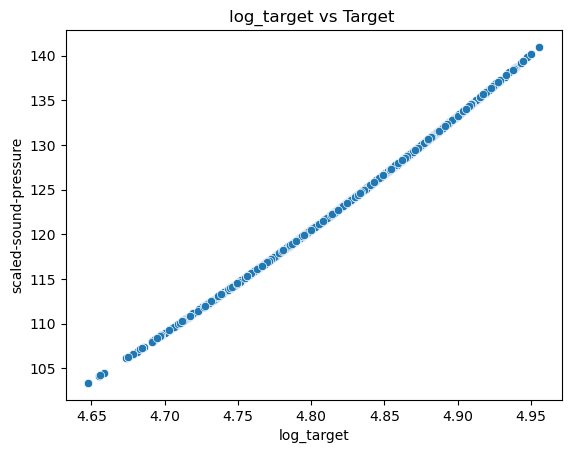

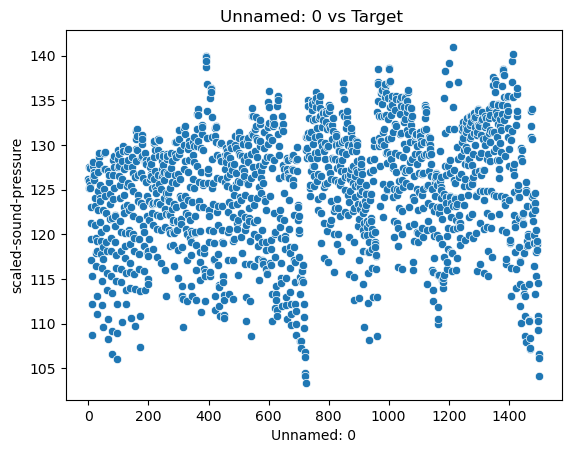

In [37]:
top_corr_features = target_corrs.index[1:4]
for col in top_corr_features:
    sns.scatterplot(data=df, x=col ,y='scaled-sound-pressure')
    plt.title(f"{col} vs Target ")
    plt.show()